In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#load dataset
df = pd.read_csv('../data/data.csv')

In [50]:
df.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


### Overview of the Data

In [51]:
# the shape of the df (number of rows and columns)
print(f"Number of rows: {df.shape[0]},\nNumber of columns: {df.shape[1]}")

Number of rows: 95662,
Number of columns: 16


In [52]:
# Check df types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [53]:
# Summary statistics for numerical features
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [54]:
df.duplicated().sum()

0

### Distribution of Numerical Features

In [55]:
numeric_features = df.select_dtypes(include=['number'])
numeric_features.columns

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

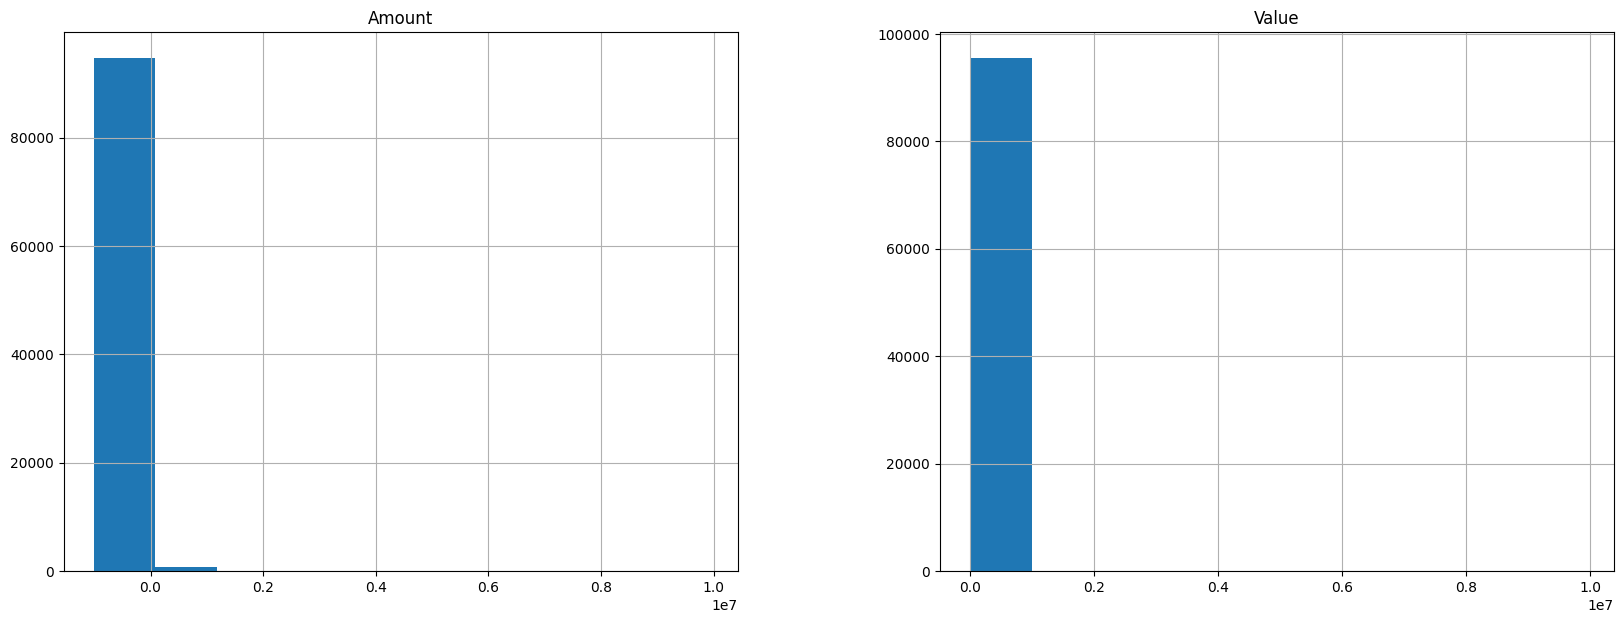

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
num_features = ['Amount', 'Value']
df[num_features].hist(bins=10, figsize=(20, 7))
plt.show()

### Distribution of Categorical Features

In [57]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')

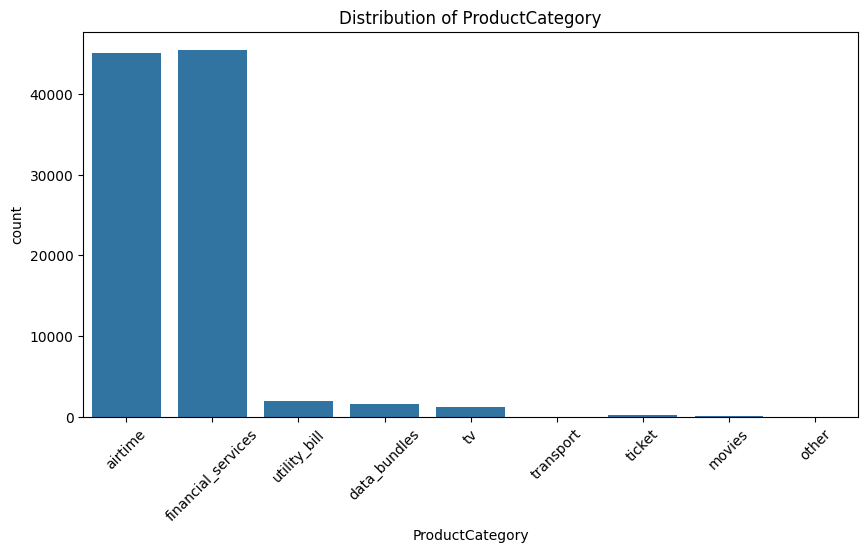

In [58]:
# Plot the distribution of categorical features
cat_features = ['ProductCategory']

for feature in cat_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

### Correlation Analysis

In [90]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'TransactionId_76871'

In [63]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


### Identifying Missing Values

In [64]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Show missing values and their percentages
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df[missing_df['Missing Values'] > 0]

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


,Missing Values,Percentage


### Outlier Detection

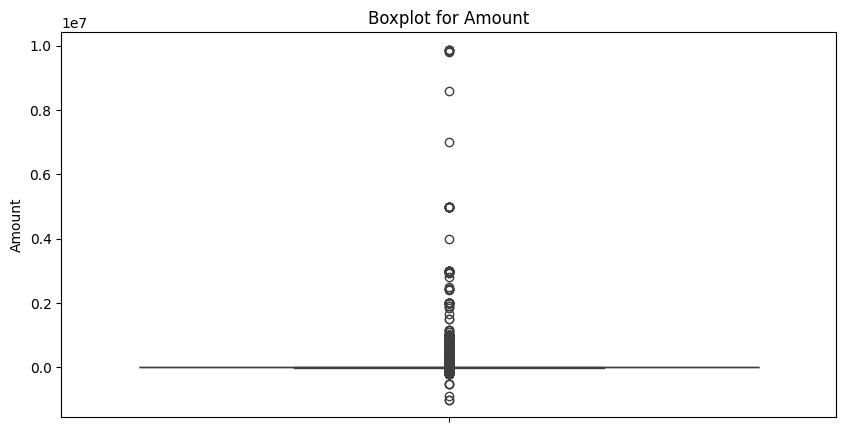

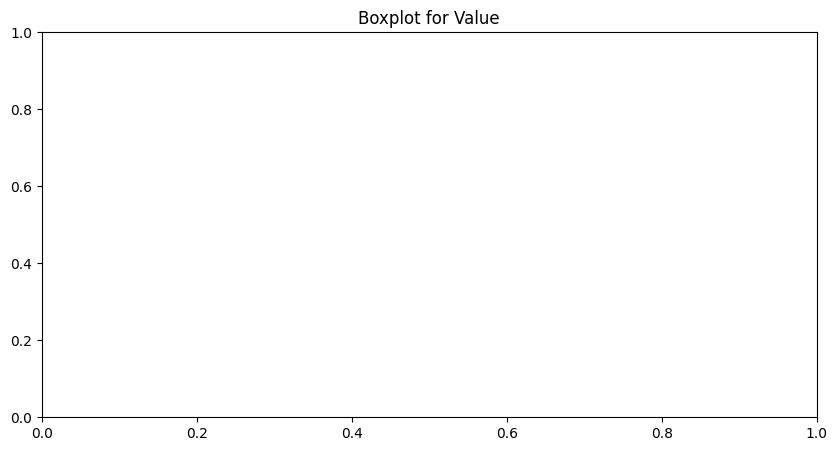

In [65]:
# Box plot for detecting outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df['Amount'])
plt.title('Boxplot for Amount')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(df=df['Value'])
plt.title('Boxplot for Value')
plt.show()

## Feature Engineering

### Create Aggregate Features

In [66]:
# Group by CustomerId to create aggregate features
customer_agg = df.groupby('CustomerId').agg(
    total_transaction_amount=('Amount', 'sum'),
    avg_transaction_amount=('Amount', 'mean'),
    transaction_count=('TransactionId', 'count'),
    std_transaction_amount=('Amount', 'std')
).reset_index()

# Fill NaN values for std_transaction_amount (because customers with 1 transaction will have NaN std)
customer_agg['std_transaction_amount'] = customer_agg['std_transaction_amount'].fillna(0)

# View the aggregated customer-level features
customer_agg.head(10)

,CustomerId,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount
0,CustomerId_1,-10000.0,-10000.000000,1,0.000000
1,CustomerId_10,-10000.0,-10000.000000,1,0.000000
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146
5,CustomerId_1004,2000.0,2000.000000,1,0.000000
6,CustomerId_1005,48800.0,5422.222222,9,5983.681513
7,CustomerId_1006,1000.0,1000.000000,1,0.000000
8,CustomerId_1007,28000.0,28000.000000,1,0.000000
9,CustomerId_1008,20000.0,10000.000000,2,0.000000


### Extract Date-Time Features

In [67]:
# Convert TransactionStartTime to datetime 
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract hour, day, month, and year
df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day'] = df['TransactionStartTime'].dt.day
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_year'] = df['TransactionStartTime'].dt.year

# View the new extracted features
df[['transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']].head()


,transaction_hour,transaction_day,transaction_month,transaction_year
0,2,15,11,2018
1,2,15,11,2018
2,2,15,11,2018
3,3,15,11,2018
4,3,15,11,2018


### Encode Categorical Variables

In [69]:
#You can use Label Encoding for ordinal categorical variables and One-Hot Encoding for nominal categorical variables.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding example for ProductCategory (if it's ordinal)
label_encoder = LabelEncoder()
df['product_category_encoded'] = label_encoder.fit_transform(df['ProductCategory'])

# One-Hot Encoding for non-ordinal categorical variables like CurrencyCode, CountryCode
df_encoded = pd.get_dummies(df, columns=['CurrencyCode', 'CountryCode'], drop_first=True)

# View encoded features
df_encoded.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year,product_category_encoded
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018,8
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018,2


### Handle Missing Values

In [38]:
# # Impute missing numerical values with mean
# df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

# # Impute missing categorical values with mode
# df['ProductCategory'] = df['ProductCategory'].fillna(df['ProductCategory'].mode()[0])

# # df = df.drop(columns=['FraudResult'], axis=1)

# # View the dataset after imputation
# df.info()

### Normalize/Standardize Numerical Features

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select numerical columns to normalize
numerical_columns = ['Amount', 'Value', 'transaction_hour']

# Apply normalization
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# View the normalized data
df[numerical_columns].head()

,Amount,Value,transaction_hour
0,0.092004,0.000101,0.086957
1,0.091910,0.000002,0.086957
2,0.091958,0.000050,0.086957
3,0.093750,0.002206,0.130435
4,0.091853,0.000065,0.130435


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply standardization
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# View the standardized data
df[numerical_columns].head()

,Amount,Value,transaction_hour
0,-0.046371,-0.072291,-2.155530
1,-0.054643,-0.080251,-2.155530
2,-0.050426,-0.076352,-2.155530
3,0.107717,0.096648,-1.949214
4,-0.059704,-0.075183,-1.949214


In [72]:
# # Ensure 'TransactionStartTime' is in datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Define Recency: Days since the last transaction for each customer
current_date = df['TransactionStartTime'].max()
print(current_date)
df['Recency'] = (current_date - df.groupby('CustomerId')['TransactionStartTime'].transform('max')).dt.days

# Define Frequency: Number of transactions per customer
df['Frequency'] = df.groupby('CustomerId')['TransactionId'].transform('count')

# Define Monetary: Total amount spent by each customer
df['Monetary'] = df.groupby('CustomerId')['Amount'].transform('sum')

# Define Seasonality: Standard deviation of transactions by month (as a proxy for seasonality)
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
seasonality = df.groupby(['CustomerId', 'TransactionMonth']).size().groupby('CustomerId').std()
df = df.merge(seasonality.rename('Seasonality'), on='CustomerId', how='left')

# Aggregate RFMS features at the customer level
rfms_features = df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Seasonality']].drop_duplicates()
rfms_features.head()


2019-02-13 10:01:28+00:00


,CustomerId,Recency,Frequency,Monetary,Seasonality
0,CustomerId_4406,0,119,-5.591789,17.632829
2,CustomerId_4683,81,2,-0.100852,NaN
3,CustomerId_988,5,38,-0.215326,6.137318
5,CustomerId_1432,90,1,-0.038261,NaN
6,CustomerId_2858,5,29,-0.822486,6.849574


### Visualize RFMS and Classify Users

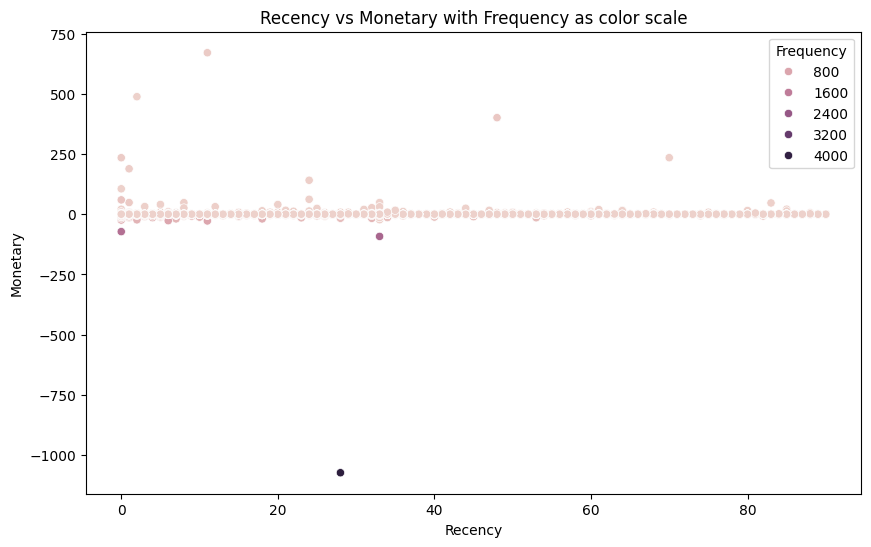

,CustomerId,Recency,Monetary,DefaultProxy
0,CustomerId_4406,0,-5.591789,0
2,CustomerId_4683,81,-0.100852,1
3,CustomerId_988,5,-0.215326,0
5,CustomerId_1432,90,-0.038261,1
6,CustomerId_2858,5,-0.822486,0


In [73]:
# Scatter plot of Recency vs. Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Frequency', data=rfms_features)
plt.title('Recency vs Monetary with Frequency as color scale')
plt.show()

# Based on the visualization, define a threshold to classify users (example: Recency > 30, Monetary < 500)
# Modify this logic based on your data and visualization
rfms_features['DefaultProxy'] = np.where((rfms_features['Recency'] > 30) & (rfms_features['Monetary'] < 500), 1, 0)  # 1 = bad, 0 = good

# View classification result
rfms_features[['CustomerId', 'Recency', 'Monetary', 'DefaultProxy']].head()

### Weight of Evidence (WoE) Binning

In [75]:
from optbinning import BinningProcess, OptimalBinning

# Select the features for binning (Recency, Frequency, Monetary, Seasonality)
features_for_binning = ['Recency', 'Frequency', 'Monetary', 'Seasonality']

# Initialize the binning process
binning_process = BinningProcess(variable_names=features_for_binning)

# Fit the binning process using the DefaultProxy as the target variable
X = rfms_features[features_for_binning]
y = rfms_features['DefaultProxy']

binning_process.fit(X, y)

# Apply binning to transform the features into WoE-binned versions
X_binned = binning_process.transform(X)

# View WoE-binned features
X_binned_df = pd.DataFrame(X_binned, columns=features_for_binning)
X_binned_df.head(10)

c:\Users\lenovo\Documents\10acadmy\Credit_Scoring_Model\.venv\lib\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


,Recency,Frequency,Monetary,Seasonality
0,-2.220446e-16,2.038506,1.530822,1.554033
2,-2.220446e-16,-1.015321,-0.704560,0.000000
3,-2.220446e-16,1.779400,-0.045199,1.423820
5,-2.220446e-16,-1.015321,-0.704560,0.000000
6,-2.220446e-16,1.130135,1.266817,1.423820
8,-2.220446e-16,-0.429944,-0.225425,0.000000
9,-2.220446e-16,-0.375730,-0.045199,0.000000
10,-2.220446e-16,0.290312,0.429266,1.423820
16,-2.220446e-16,2.038506,1.530822,1.554033
19,-2.220446e-16,0.290312,0.429266,1.175571


                Bin  Count  Count (%)  Non-event  Event  Event rate  WoE   IV  \
0       (-inf, inf)   3742        1.0       2084   1658    0.443079 -0.0  0.0   
1           Special      0        0.0          0      0    0.000000  0.0  0.0   
2           Missing      0        0.0          0      0    0.000000  0.0  0.0   
Totals                3742        1.0       2084   1658    0.443079       0.0   

         JS  
0       0.0  
1       0.0  
2       0.0  
Totals  0.0  


AttributeError: Line2D.set() got an unexpected keyword argument 'metric'

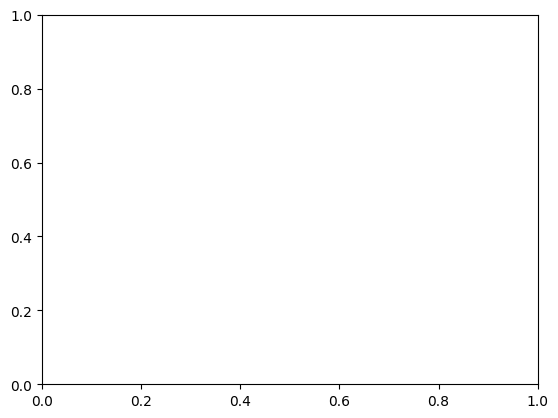

In [79]:
# Calculate WoE for Recency feature
optimal_binning_recency = OptimalBinning(name="Recency", dtype="numerical", solver="cp")
optimal_binning_recency.fit(rfms_features['Recency'], rfms_features['DefaultProxy'])

# Get binning table to analyze WoE
binning_table_recency = optimal_binning_recency.binning_table.build()
print(binning_table_recency)

# Plot WoE for Recency
binning_table_recency.plot(metric="woe")
plt.title('Weight of Evidence (WoE) for Recency')
plt.show()
# Assuming binning_table_recency has columns like 'Bin', 'WoE'
# plt.figure(figsize=(10, 6))
# plt.bar(binning_table_recency['Bin'], binning_table_recency['WoE'])
# plt.xlabel('Bin')
# plt.ylabel('Weight of Evidence (WoE)')
# plt.title('Weight of Evidence (WoE) for Recency')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.grid(True)
# plt.show()

In [80]:
from sklearn.model_selection import train_test_split

# Features (RFMS + WoE bins)
X = X_binned_df  # Features after WoE binning
y = rfms_features['DefaultProxy']  # Target variable (0 = good, 1 = bad)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the train/test split
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (2993, 4), Test shape: (749, 4)


### Choose Models

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
#LogisticRegression
log_reg = LogisticRegression(random_state=42)

#RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

### Train the Models

In [84]:
# Train Logistic Regression
log_reg.fit(X_train, y_train)

# Train Random Forest
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Hyperparameter Tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random search with 5-fold cross-validation
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters for Random Forest:", random_search.best_params_)

# Train the Random Forest with the best parameters
best_rf_clf = random_search.best_estimator_

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


### Model Evaluation

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate Logistic Regression
log_reg_metrics = evaluate_model(log_reg, X_test, y_test)
print(f"Logistic Regression Metrics: \nAccuracy={log_reg_metrics[0]}, \nPrecision={log_reg_metrics[1]}, \nRecall={log_reg_metrics[2]}, \nF1={log_reg_metrics[3]}, \nROC-AUC={log_reg_metrics[4]}\n")

# Evaluate Random Forest
rf_metrics = evaluate_model(best_rf_clf, X_test, y_test)
print(f"Random Forest Metrics: \nAccuracy={rf_metrics[0]}, \nPrecision={rf_metrics[1]}, \nRecall={rf_metrics[2]}, \nF1={rf_metrics[3]}, \nROC-AUC={rf_metrics[4]}")

Logistic Regression Metrics: 
Accuracy=0.6675567423230975, 
Precision=0.5976470588235294, 
Recall=0.7650602409638554, 
F1=0.6710700132100397, 
ROC-AUC=0.7348675276646153

Random Forest Metrics: 
Accuracy=0.671562082777036, 
Precision=0.5934782608695652, 
Recall=0.822289156626506, 
F1=0.6893939393939394, 
ROC-AUC=0.7407977232671694


### Model Comparison

In [77]:
# checking the balance of the data
print('The number of Non-Frauds are: ' + str(df['FraudResult'].value_counts()[0]) + ' which is', round(df['FraudResult'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The number of Frauds are: ' + str(df['FraudResult'].value_counts()[1]) + ' which is', round(df['FraudResult'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

The number of Non-Frauds are: 95469 which is 99.8 % of the dataset
The number of Frauds are: 193 which is 0.2 % of the dataset


In [52]:
df['FraudResult'].value_counts()

FraudResult
0    95469
1      193
Name: count, dtype: int64

<Axes: xlabel='FraudResult', ylabel='count'>

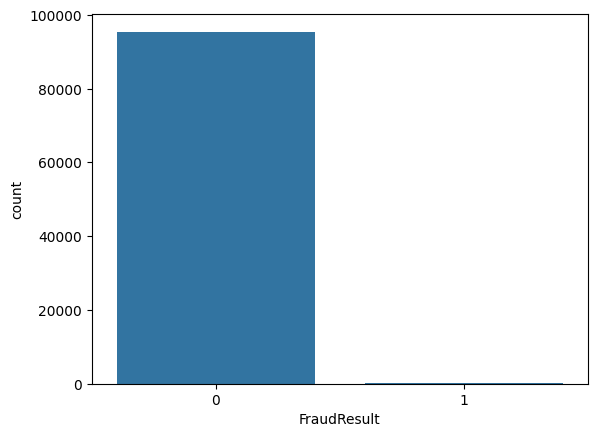

In [21]:
# visualize category class
sns.countplot(x='FraudResult', data=df)

In [38]:
numeric_features = df.select_dtypes(include=['number'])
numeric_features.columns

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

In [37]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')

### BIVARIATE VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

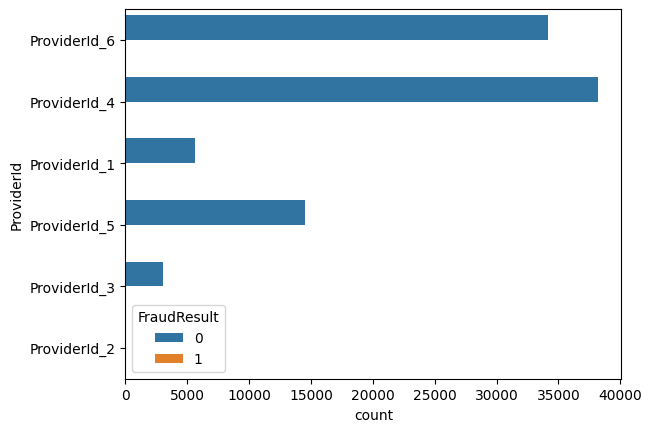

In [42]:
# pricing and fraudresults
sns.countplot(y='ProviderId', data=df, hue='FraudResult')
plt.show

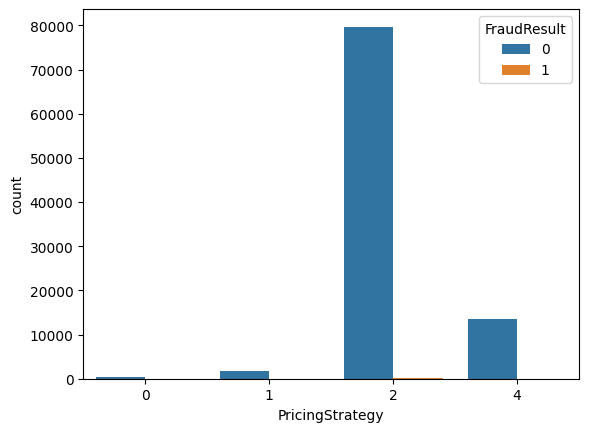

In [44]:
# pricingstrategy and fraudresult
sns.countplot(x='PricingStrategy', data=df, hue='FraudResult')
plt.show()

In [47]:
df['ProductCategory'].value_counts()

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='ProductCategory'>

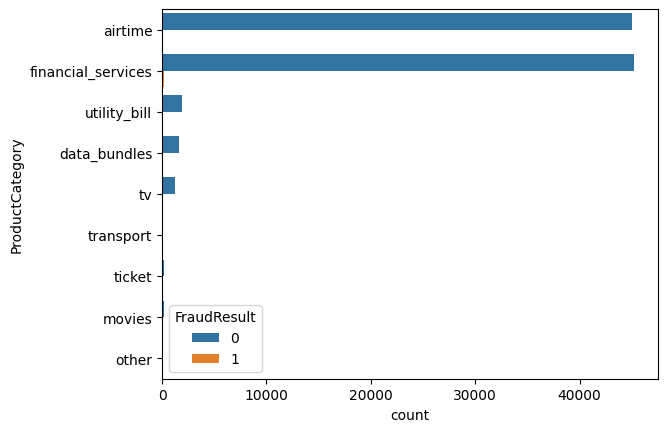

In [45]:
# product category and fraudresult
sns.countplot(y='ProductCategory',data = df, hue = 'FraudResult')

<Axes: xlabel='count', ylabel='ProductId'>

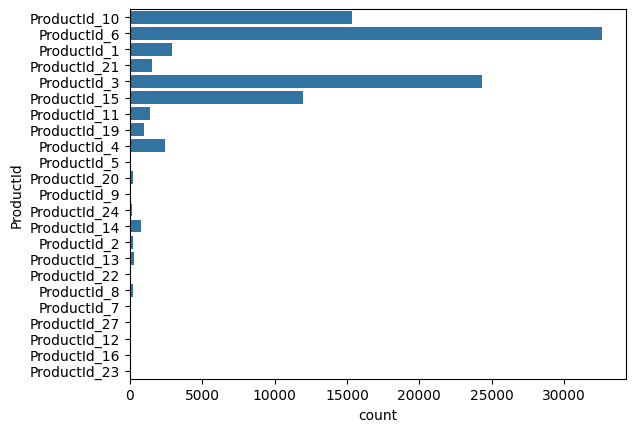

In [69]:
sns.countplot(y="ProductId",data=df)

In [49]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'period'],
      dtype='object')

In [104]:
df['time'] = pd.to_datetime(df['TransactionStartTime'], format="%Y-%m-%dT%H:%M:%SZ")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,period,amount is positive,amount != value,time
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,NaN,1,0,2018-11-15 02:18:49
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,NaN,0,0,2018-11-15 02:19:08
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,NaN,1,0,2018-11-15 02:44:21
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,NaN,1,1,2018-11-15 03:32:55
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,NaN,0,0,2018-11-15 03:34:21


### FEATURE ENGINEERING

In [ ]:
# TIME WRANGLING
# df
df['hour'] = pd.to_datetime(df.TransactionStartTime).dt.hour
df['minute'] = pd.to_datetime(df.TransactionStartTime).dt.minute
df['day'] = pd.to_datetime(df.TransactionStartTime).dt.dayofweek

# # validation
# validation['hour'] = pd.to_datetime(validation.TransactionStartTime).dt.hour
# validation['minute'] = pd.to_datetime(validation.TransactionStartTime).dt.minute
# validation['day'] = pd.to_datetime(validation.TransactionStartTime).dt.dayofweek

In [46]:
df['period'] = np.nan

In [60]:
df['amount is positive'] = (df['Amount']>0).astype(int)
df['amount != value'] = (np.abs(df['Amount']) != df['Value']).astype(int)
# df['amount is positive'].head(10)
df.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,period,amount is positive,amount != value
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,NaN,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,NaN,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,NaN,1,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,NaN,1,1
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,NaN,0,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0,NaN,1,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0,NaN,1,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0,NaN,0,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0,NaN,1,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0,NaN,1,0


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
tree= DecisionTreeClassifier(max_depth = 4, random_state = 19)
X = df.drop(['TransactionStartTime','FraudResult'], axis =1)
y = df['FraudResult']

In [64]:
df['TransactionId'].unique()

array(['TransactionId_76871', 'TransactionId_73770',
       'TransactionId_26203', ..., 'TransactionId_82501',
       'TransactionId_136354', 'TransactionId_35670'], dtype=object)

In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(df[['TransactionId']]))  # Encode only the TransactionId column
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size = 0.3, random_state =19)
tree.fit(X_train, y_train)
tree_dot = export_graphviz(tree)
print(tree_dot)

c:\Users\lenovo\Documents\10acadmy\Credit_Scoring_Model\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MemoryError: Unable to allocate 68.2 GiB for an array with shape (95662, 95662) and data type float64